# Image Data Augmentation Exercise : **CIFAR-100**
---
## 데이터가 더 부족한 세상으로!

[여기 참고](https://www.cs.toronto.edu/~kriz/cifar.html)

## Keras Update

In [1]:
!pip install keras-nightly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 17.7 MB/s eta 0:00:00


## Data Loading

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets.cifar100 import load_data

In [3]:
(train_x, train_y), (test_x, test_y) = load_data()
# (train_x, train_y), (test_x, test_y) = load_data(label_mode='coarse') ## 이것이 슈퍼클래스 버전의 데이터셋

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [4]:
np.unique(train_y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [5]:
label_dict = {0:'apple', 1: 'aquarium_fish', 2: 'baby', 3: 'bear', 4: 'beaver', 5: 'bed', 6: 'bee', 7: 'beetle', 8: 'bicycle', 9: 'bottle',
              10: 'bowl', 11: 'boy',12: 'bridge',13: 'bus',14: 'butterfly',15: 'camel',16: 'can',17: 'castle',18: 'caterpillar',19: 'cattle',
              20: 'chair',21: 'chimpanzee',22: 'clock',23: 'cloud',24: 'cockroach',25: 'couch',26: 'cra',27: 'crocodile',28: 'cup',29: 'dinosaur',
              30: 'dolphin',31: 'elephant',32: 'flatfish',33: 'forest',34: 'fox',35: 'girl',36: 'hamster',37: 'house',38: 'kangaroo',39: 'keyboard',
              40: 'lamp',41: 'lawn_mower',42: 'leopard',43: 'lion',44: 'lizard',45: 'lobster',46: 'man',47: 'maple_tree',48: 'motorcycle',49: 'mountain',
              50: 'mouse',51: 'mushroom',52: 'oak_tree',53: 'orange',54: 'orchid',55: 'otter',56: 'palm_tree',57: 'pear',58: 'pickup_truck',59: 'pine_tree',
              60: 'plain',61: 'plate',62: 'poppy',63: 'porcupine',64: 'possum',65: 'rabbit',66: 'raccoon',67: 'ray',68: 'road',69: 'rocket',
              70: 'rose',71: 'sea',72: 'seal',73: 'shark',74: 'shrew',75: 'skunk',76: 'skyscraper',77: 'snail',78: 'snake',79: 'spider',
              80: 'squirrel',81: 'streetcar',82: 'sunflower',83: 'sweet_pepper',84: 'table',85: 'tank',86: 'telephone',87: 'television',88: 'tiger',89: 'tractor',
              90: 'train',91: 'trout',92: 'tulip',93: 'turtle',94: 'wardrobe',95: 'whale',96: 'willow_tree',97: 'wolf',98: 'woman',99: 'worm'
            }

label_dict[0]

'apple'

* 데이터 살펴보기

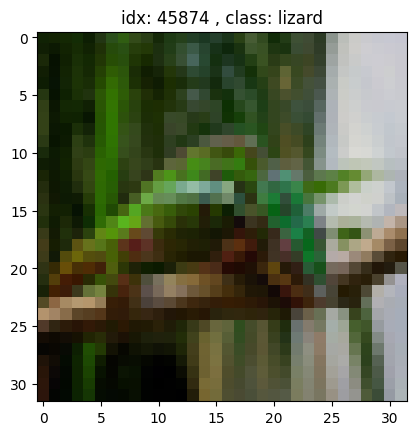

In [6]:
rand_i = np.random.randint(0, train_x.shape[0])

plt.title(f'idx: {rand_i} , class: { label_dict[train_y[rand_i][0]] }')
plt.imshow( train_x[rand_i] )
plt.show()

In [7]:
rows = 5
fig, axes = plt.subplots(rows, len(label_dict), figsize=(len(label_dict), rows) )

for img_id in range(len(label_dict)) :
    imgs = train_x[train_y.reshape(-1)==img_id]
    imgs_len = len(imgs)

    for row_i in range(rows) :
        axe = axes[row_i, img_id]
        axe.imshow( imgs[np.random.randint(imgs_len)], interpolation='none' )
        axe.axis('off')

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

## Data Preprocessing

* Data split
    - training set : validation set = 8 : 2
    - 재현을 위한 난수 고정 : 2024

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y,
                                                  test_size=0.2, random_state=2024)

In [8]:
train_x.shape, train_y.shape, val_x.shape, val_y.shape

((40000, 32, 32, 3), (40000, 1), (10000, 32, 32, 3), (10000, 1))

* Scaling <- PASS

    - min-max scaling
        1. RGB 정보 전체를 min-max

In [ ]:
# min_n, max_n = train_x.min(), train_x.max()

In [ ]:
# train_x = (train_x - min_n) / (max_n - min_n)
# val_x = (val_x - min_n) / (max_n - min_n)
# test_x = (test_x - min_n) / (max_n - min_n)

In [ ]:
# train_x.min(), train_x.max()

* One-hot encoding <- PASS

In [ ]:
# from keras.utils import to_categorical

In [ ]:
# train_y = to_categorical(train_y, 100)
# val_y = to_categorical(val_y, 100)
# test_y = to_categorical(test_y, 100)

In [11]:
train_y

array([[ 2],
       [58],
       [74],
       ...,
       [15],
       [78],
       [35]])

In [12]:
train_y[0]

array([2])

* Data shape 재확인

In [9]:
train_x.shape, train_y.shape, val_x.shape, val_y.shape, test_x.shape, test_y.shape

((40000, 32, 32, 3),
 (40000, 1),
 (10000, 32, 32, 3),
 (10000, 1),
 (10000, 32, 32, 3),
 (10000, 1))

## Modeling : CNN + **Image Preprocessing&Augmentation**

- 조건
    1. Sequential API, Functional API 중 택일.
    2. Image Augmentation Layer를 최소 하나 이상 넣을 것! : [공식 문서 참고](https://keras.io/api/layers/preprocessing_layers/)
    3. [이 구조를 미니 버전으로 활용해봐도 좋다.](https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F99DFA5415B38AC752E)
    4. DropOut, BatchNormalization 등의 기능도 같이 활용해보자.
    5. Early Stopping을 사용할 것.
    * y에 대한 shape를 살펴본 후, compile을 어떻게 설정해야 할 지 생각해보세요! : )
        - hint : sparse_...

In [13]:
import keras

from keras.utils import clear_session, plot_model
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Flatten, Conv2D, MaxPool2D, BatchNormalization, Dropout
from keras.layers import RandomRotation, RandomZoom, RandomFlip

In [16]:
## Sequential API
# 1. 세션 클리어
clear_session()

# 2. 모델 발판 선언 및 레이어 조립
model = Sequential([Input(shape=(32,32,3)),
                    ###########################
                    # Augmentation Layer부터 적용
                    RandomRotation(0.1),
                    RandomZoom(0.1),
                    RandomFlip('horizontal'),
                    ###########################
                    Conv2D(64, 3, 1, 'same', activation='relu'),
                    Conv2D(64, 3, 1, 'same', activation='relu'),
                    MaxPool2D(2),
                    BatchNormalization(),
                    Dropout(0.4),
                    Conv2D(128, 3, 1, 'same', activation='relu'),
                    Conv2D(128, 3, 1, 'same', activation='relu'),
                    MaxPool2D(2),
                    BatchNormalization(),
                    Dropout(0.4),
                    Flatten(),
                    Dense(512, activation='relu'),
                    Dense(100, activation='softmax')
                    ])

# 요약
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ random_rotation (RandomRotation)     │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_zoom (RandomZoom)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_flip (RandomFlip)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       4,194,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          51,300 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,507,044 (17.19 MB)

 Trainable params: 4,506,660 (17.19 MB)

 Non-trainable params: 384 (1.50 KB)

In [20]:
## Functional API
# 1. 세션 클리어
clear_session()

# 2. 레이어 엮기
il = Input(shape=(32,32,3))
###########################
# Augmentation Layer부터 적용
al = RandomRotation(0.1)(il)
al = RandomZoom(0.1)(al)
al = RandomFlip('horizontal')(al)
###########################
hl = Conv2D(64, 3, 1, 'same', activation='relu')(al)
hl = Conv2D(64, 3, 1, 'same', activation='relu')(hl)
hl = MaxPool2D(2)(hl)
hl = BatchNormalization()(hl)
hl = Dropout(0.4)(hl)

# hl = Conv2D(128, 3, 1, 'same', activation='relu')(al) ## plot_model로 현상을 보기위해 잠시 al로 해봄!
hl = Conv2D(128, 3, 1, 'same', activation='relu')(hl)
hl = Conv2D(128, 3, 1, 'same', activation='relu')(hl)
hl = MaxPool2D(2)(hl)
hl = BatchNormalization()(hl)
hl = Dropout(0.4)(hl)

hl = Flatten()(hl)
hl = Dense(512, activation='relu')(hl)
ol = Dense(100, activation='softmax')(hl)

# 3. 모델 시작, 끝 레이어 지정
model = Model(il, ol)

# 요약
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_rotation (RandomRotation)     │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_zoom (RandomZoom)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_flip (RandomFlip)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       4,194,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          51,300 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,507,044 (17.19 MB)

 Trainable params: 4,506,660 (17.19 MB)

 Non-trainable params: 384 (1.50 KB)

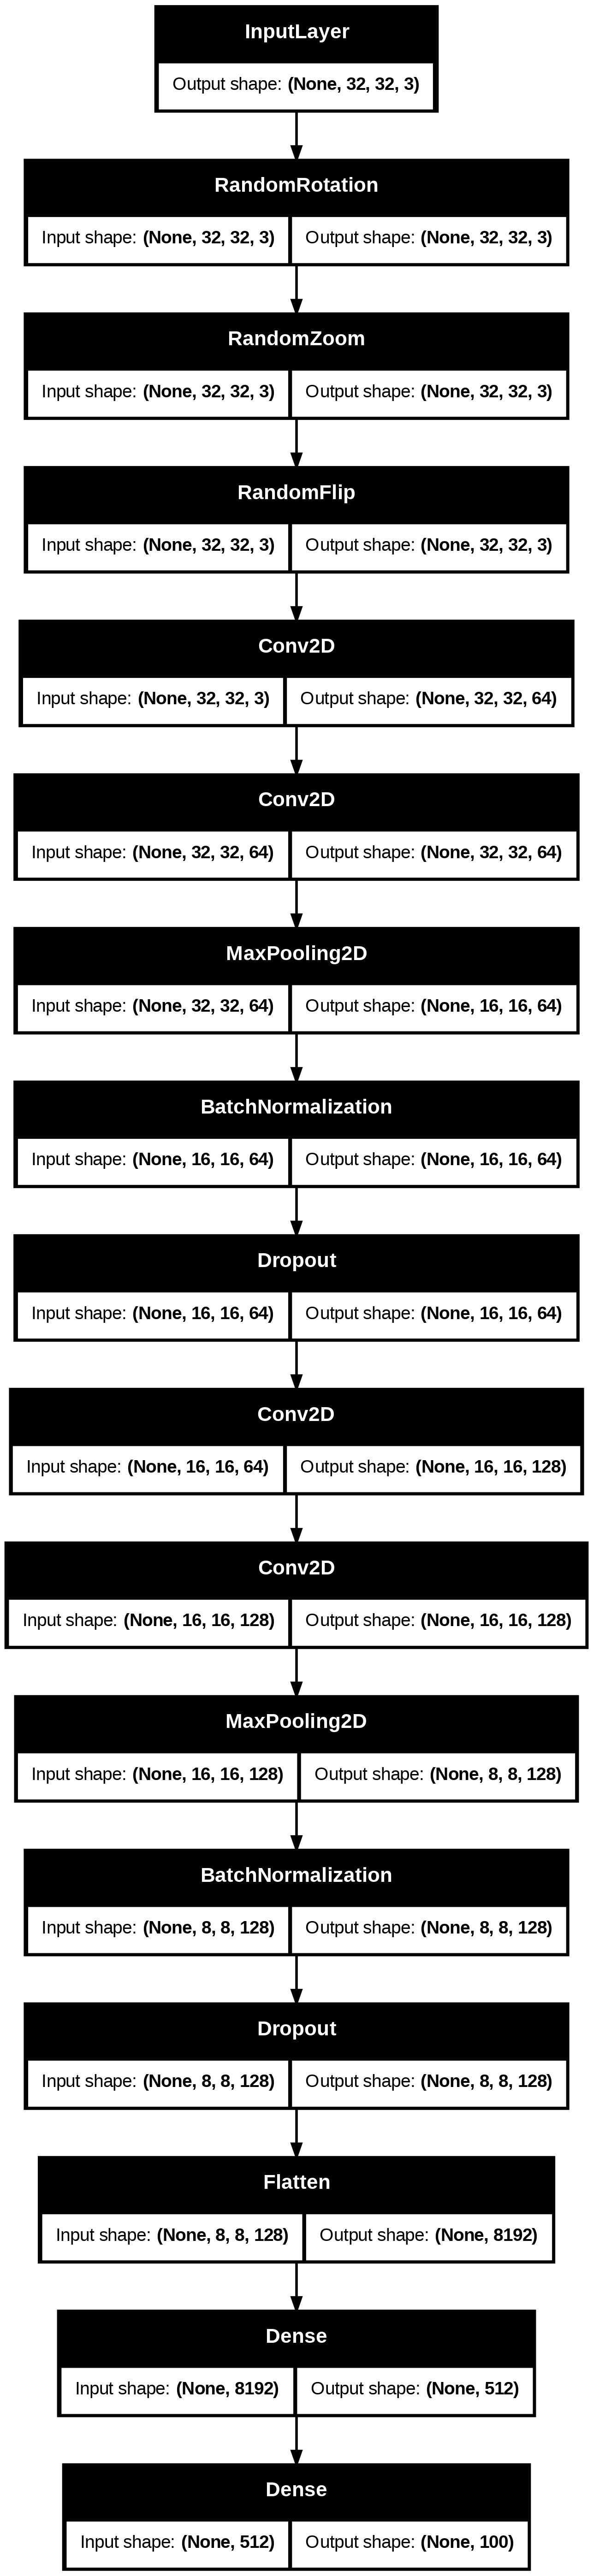

In [21]:
plot_model(model, show_shapes=True)

In [22]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', ## one-hot encoding 안 하였을 때!!
              metrics=['accuracy']
              )

* Early Stopping

In [23]:
from keras.callbacks import EarlyStopping

In [24]:
es = EarlyStopping(patience=3, verbose=1, restore_best_weights=True)

* .fit( )

In [25]:
model.fit(train_x, train_y, validation_data=(val_x, val_y),
          epochs=1000, verbose=1,
          callbacks=[es]
          )

Epoch 1/1000
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.0649 - loss: 4.3075 - val_accuracy: 0.1243 - val_loss: 3.7510
Epoch 2/1000
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 35s 12ms/step - accuracy: 0.1657 - loss: 3.4831 - val_accuracy: 0.1808 - val_loss: 3.4097
Epoch 3/1000
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.2196 - loss: 3.1966 - val_accuracy: 0.2436 - val_loss: 3.0710
Epoch 4/1000
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.2479 - loss: 3.0107 - val_accuracy: 0.2669 - val_loss: 2.9858
Epoch 5/1000
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.2778 - loss: 2.8669 - val_accuracy: 0.2894 - val_loss: 2.8487
Epoch 6/1000
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.3010 - loss: 2.7588 - val_accuracy: 0.2741 - val_loss: 3.0624
Epoch 7/1000
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.3218 - loss: 2.6505 - val_accuracy: 0.3331 - val_loss: 2.6180
Epoch 8/1000
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - ac

KeyboardInterrupt: 

* .evaluate( )

In [26]:
model.evaluate(test_x, test_y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3929 - loss: 2.4247


[2.417041301727295, 0.3968000113964081]

* .predict( )

In [27]:
y_pred = model.predict(test_x)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [49]:
# 원핫 인코딩 한 것을 다시 묶어주는 코드
# 평가 지표 및 실제 데이터 확인을 위해 필요

y_pred_arg = np.argmax(y_pred, axis=1)
# test_y_arg = np.argmax(test_y, axis=1)
# test_y_arg = test_y.reshape(-1)
test_y_arg = test_y

In [50]:
y_pred_arg[0]

30

In [51]:
test_y_arg[0]

array([49])

* 평가 지표

In [52]:
from sklearn.metrics import accuracy_score, classification_report

In [53]:
accuracy_score(test_y_arg, y_pred_arg)

0.3968

In [54]:
print( classification_report(test_y_arg, y_pred_arg, target_names=list(label_dict.values())) )

               precision    recall  f1-score   support

        apple       0.73      0.63      0.68       100
aquarium_fish       0.74      0.34      0.47       100
         baby       0.44      0.15      0.22       100
         bear       0.23      0.11      0.15       100
       beaver       0.17      0.27      0.21       100
          bed       0.37      0.35      0.36       100
          bee       0.60      0.48      0.53       100
       beetle       0.50      0.53      0.52       100
      bicycle       0.25      0.75      0.37       100
       bottle       0.47      0.46      0.46       100
         bowl       0.48      0.13      0.20       100
          boy       0.28      0.22      0.24       100
       bridge       0.48      0.42      0.45       100
          bus       0.30      0.33      0.31       100
    butterfly       0.50      0.22      0.31       100
        camel       0.28      0.30      0.29       100
          can       0.62      0.30      0.41       100
       ca

## Visualization

* 실제 데이터 확인

idx = 4122
해당 인덱스의 이미지는 castle
모델의 예측 : castle
모델의 클래스별 확률 : 
-------------------
apple 0.0
aquarium_fish 0.0
baby 0.0
bear 0.0
beaver 0.0
bed 0.0
bee 0.0
beetle 0.0
bicycle 0.0
bottle 0.0
bowl 0.0
boy 0.0
bridge 0.0
bus 0.0
butterfly 0.0
camel 0.0
can 0.0
castle 71.0
caterpillar 0.0
cattle 0.0
chair 0.0
chimpanzee 0.0
clock 0.0
cloud 0.0
cockroach 0.0
couch 0.0
cra 0.0
crocodile 0.0
cup 0.0
dinosaur 0.0
dolphin 0.0
elephant 0.0
flatfish 0.0
forest 0.0
fox 0.0
girl 0.0
hamster 0.0
house 28.0
kangaroo 0.0
keyboard 0.0
lamp 0.0
lawn_mower 0.0
leopard 0.0
lion 0.0
lizard 0.0
lobster 0.0
man 0.0
maple_tree 0.0
motorcycle 0.0
mountain 0.0
mouse 0.0
mushroom 0.0
oak_tree 0.0
orange 0.0
orchid 0.0
otter 0.0
palm_tree 0.0
pear 0.0
pickup_truck 0.0
pine_tree 0.0
plain 0.0
plate 0.0
poppy 0.0
porcupine 0.0
possum 0.0
rabbit 0.0
raccoon 0.0
ray 0.0
road 0.0
rocket 0.0
rose 0.0
sea 0.0
seal 0.0
shark 0.0
shrew 0.0
skunk 0.0
skyscraper 0.0
snail 0.0
snake 0.0
spider 0.0
squirrel 0.0
streetcar 0.0
s

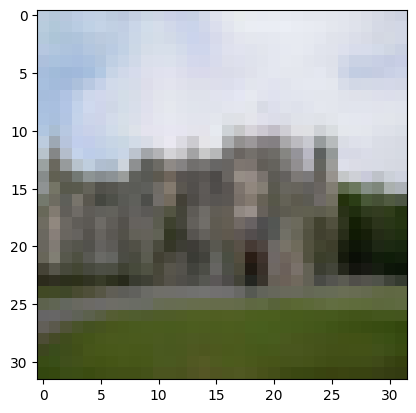

In [56]:
rand_idx = np.random.randint(0, len(y_pred_arg))
test_idx = test_y_arg[rand_idx]
pred_idx = y_pred_arg[rand_idx]
class_prob = np.floor( y_pred[rand_idx]*100 )

print(f'idx = {rand_idx}')
print(f'해당 인덱스의 이미지는 {label_dict[test_idx[0]]}')
print(f'모델의 예측 : {label_dict[pred_idx]}')
print(f'모델의 클래스별 확률 : ')
print('-------------------')
for idx, val in enumerate( list(label_dict.values()) ) :
    print(val, class_prob[idx])
print('=================================================')

if test_y_arg[rand_idx] == y_pred_arg[rand_idx] :
    print('정답')
else :
    print('땡')

plt.imshow(test_x[rand_idx])
plt.show()

* 틀린 이미지만 확인해보기

In [57]:
temp = (test_y_arg == y_pred_arg)
false_idx = np.where(temp==False)[0]
false_len = len(false_idx)
false_len

99000000

idx = 7956
해당 인덱스의 이미지는 willow_tree
모델의 예측 : elephant
모델의 클래스별 확률 : 
-------------------
apple 0.0
aquarium_fish 0.0
baby 0.0
bear 0.0
beaver 0.0
bed 0.0
bee 0.0
beetle 0.0
bicycle 0.0
bottle 0.0
bowl 0.0
boy 0.0
bridge 1.0
bus 0.0
butterfly 0.0
camel 0.0
can 0.0
castle 2.0
caterpillar 0.0
cattle 0.0
chair 0.0
chimpanzee 0.0
clock 0.0
cloud 0.0
cockroach 0.0
couch 0.0
cra 0.0
crocodile 0.0
cup 0.0
dinosaur 0.0
dolphin 0.0
elephant 40.0
flatfish 0.0
forest 38.0
fox 0.0
girl 0.0
hamster 0.0
house 3.0
kangaroo 0.0
keyboard 0.0
lamp 0.0
lawn_mower 0.0
leopard 0.0
lion 0.0
lizard 0.0
lobster 0.0
man 0.0
maple_tree 0.0
motorcycle 0.0
mountain 0.0
mouse 0.0
mushroom 0.0
oak_tree 0.0
orange 0.0
orchid 0.0
otter 0.0
palm_tree 0.0
pear 0.0
pickup_truck 0.0
pine_tree 0.0
plain 0.0
plate 0.0
poppy 0.0
porcupine 0.0
possum 0.0
rabbit 0.0
raccoon 0.0
ray 0.0
road 0.0
rocket 0.0
rose 0.0
sea 0.0
seal 0.0
shark 0.0
shrew 0.0
skunk 0.0
skyscraper 3.0
snail 0.0
snake 0.0
spider 0.0
squirrel 0.0
streetca

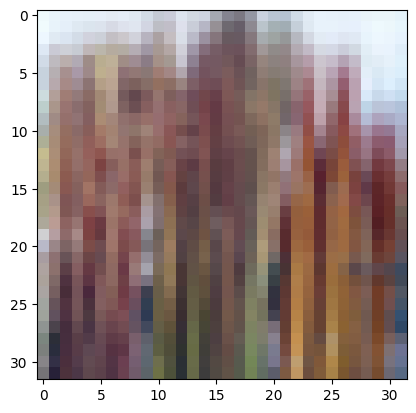

In [58]:
rand_idx = false_idx[np.random.randint(0, false_len)]
test_idx = test_y_arg[rand_idx]
pred_idx = y_pred_arg[rand_idx]
class_prob = np.floor( y_pred[rand_idx]*100 )

print(f'idx = {rand_idx}')
print(f'해당 인덱스의 이미지는 {label_dict[test_idx[0]]}')
print(f'모델의 예측 : {label_dict[pred_idx]}')
print(f'모델의 클래스별 확률 : ')
print('-------------------')
for idx, val in enumerate( list(label_dict.values()) ) :
    print(val, class_prob[idx])
print('=================================================')

if test_y_arg[rand_idx] == y_pred_arg[rand_idx] :
    print('정답')
else :
    print('땡')

plt.imshow(test_x[rand_idx] )
plt.show()